# Investigating Titanic Data set

In [1]:
#importing data 
import pandas as pd
data = pd.read_csv('titanic_data.csv')

In [2]:
# data analysis and wrangling libraries
import pandas as pd
import numpy as np
import random as rnd

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning model
from sklearn.linear_model import LogisticRegression

describing data

In [3]:
# what's the size of the data I'll be dealing with
data.shape

(891, 12)

In [4]:
#data headers
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
#data tails
data.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#data_columns
columns = data.columns.values.tolist()
columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
#What's the data type of the features
#What's the number of the filled values ?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#What's the number of the missing values per column ?
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Let's look at the distribution of numerical features
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Let's have a look at the unique values of each column 
def unique_values(df,column):
    column_values = df[column].unique()
    return column_values

In [11]:
#columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp',
#'Parch','Ticket','Fare','Cabin','Embarked']
PassengerId = unique_values(data,'PassengerId' )
Survived = unique_values(data,'Survived' )
Pclass = unique_values(data,'Pclass' )
Name = unique_values(data,'Name' )
Sex = unique_values(data,'Sex' )
Age = unique_values(data,'Age' )
SibSp = unique_values(data,'SibSp' )
Parch = unique_values(data,'Parch' )
Ticket = unique_values(data,'Ticket' )
Fare = unique_values(data,'Fare' )
Cabin = unique_values(data,'Cabin' )
Embarked = unique_values(data,'Embarked' )

In [12]:
#Number of filled cells by feature
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Exploratory Data Analysis : Univariate Analysis

In [13]:
#It's very important to start by looking at the distribution of the \
#target variable

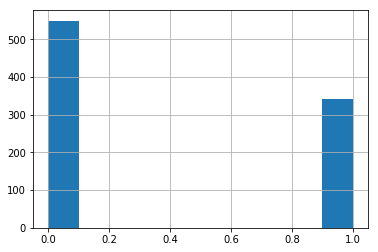

In [14]:
data['Survived'].hist()

In [15]:
#The following charts will be describing the distribution of the features

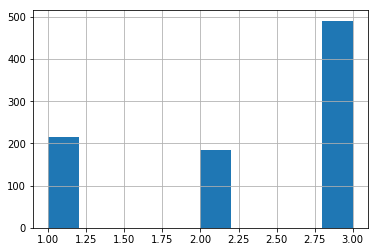

In [16]:
# Pclass distribution
data['Pclass'].hist()

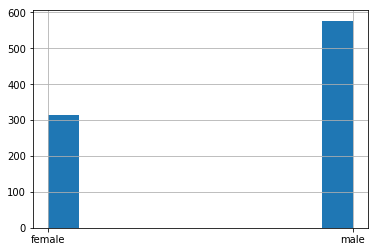

In [17]:
#Sex passenger distribution
data['Sex'].hist()

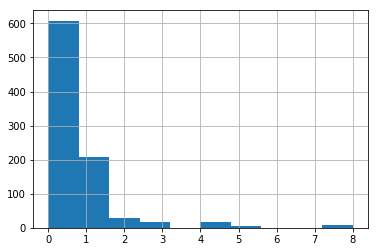

In [18]:
#distribution of number of siblings / spouses aboard the Titanic
data['SibSp'].hist()

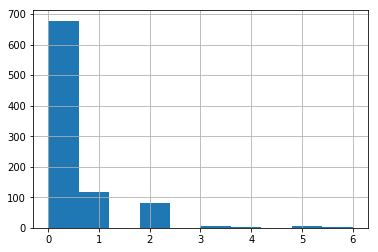

In [19]:
#distribution of number of parents / children aboard the Titanic
data['Parch'].hist()

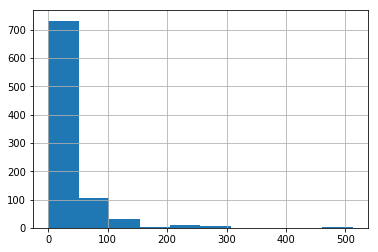

In [20]:
#Distribution of Fare
data['Fare'].hist()

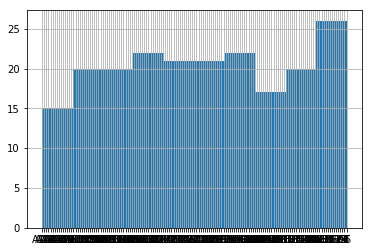

In [21]:
#Cabin distribution
data['Cabin'].hist()

It's pretty clear to eyes that the feature cabin is noise for the data.

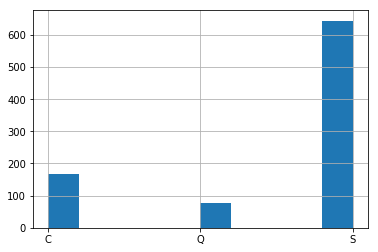

In [22]:
# distribution of Port of Embarkation 
#C = Cherbourg, Q = Queenstown, S = Southampton
data['Embarked'].hist()

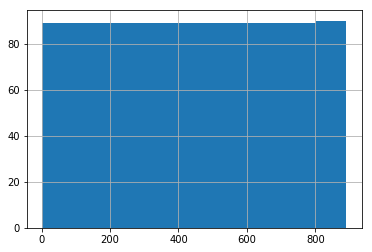

In [23]:
#Eventhough there's no need to look at the distribution of the features #passengerID
#Name and ticket, but I'm still curious about plotting their 
#distributions.
data['PassengerId'].hist()


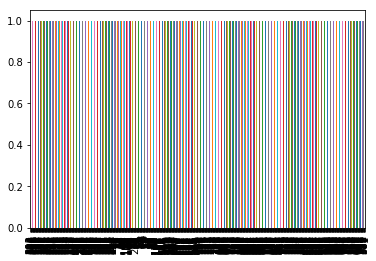

In [24]:
data['PassengerId'].value_counts().plot.bar()

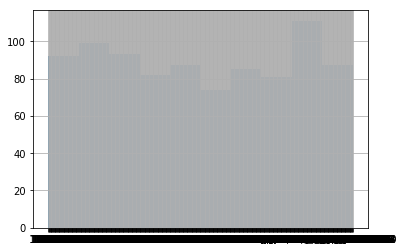

In [25]:
data['Ticket'].hist()

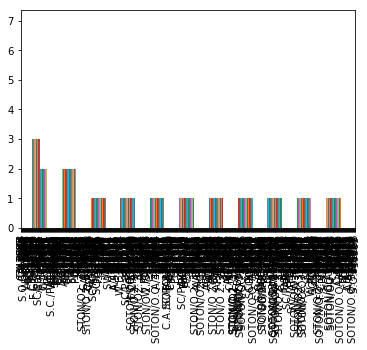

In [26]:
data['Ticket'].value_counts().plot.bar()

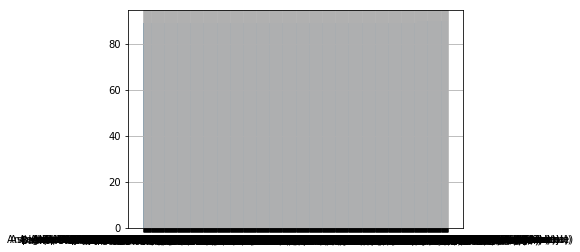

In [27]:
data['Name'].hist()

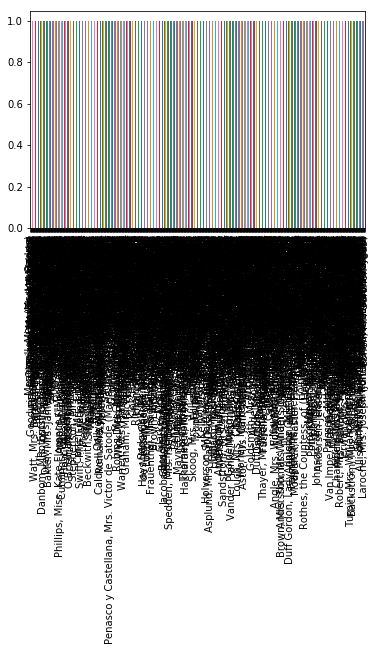

In [28]:
data['Name'].value_counts().plot.bar()

Univariate data analysis insights : Those Univariate statistics can give us an overview about the data , the potentiel features and noisy features.
From these statistics , I can tell that Age, Sex, Pclass','SibSp',
'Parch','Fare','Embarked' are my potentiel features.
I would also like to say that the values of age that are less than 1, are valid values referring to the documentation.
I'll also consider filling the missing values in the column age.
In further steps, for accuracy-improving purpose I can consider pooling the features 'Parch' ,'SibSp'and 'Fare' considering its distribution

Exploratory data analysis : Bivariate analysis

In [29]:
#since the target variable is categorical, I will split the data 
#by the state of the passenger (dead_data and survivors_data
#and will explore the 
#variance of the target variable per potentiel feature by looking at the 
#feature distribution.

In [145]:
#organizing data 
from collections import OrderedDict
organized_dict = OrderedDict({'PassengerId':data['PassengerId'],\
                         'Name':data['Name'], 'Sex': data['Sex'],\
                         'Age': data['Age'],'SibSp':data['SibSp'],\
                         'Parch' : data['Parch'],'Ticket': data['Ticket'],\
                         'Fare':data['Fare'],'Pclass':data['Pclass'],\
                              'Cabin': data['Cabin'],\
                         'Embarked' : data['Embarked'],'Survived':data\
                         ['Survived']})
organized_data = pd.DataFrame.from_dict(organized_dict)

In [146]:
#selecting columns
new_data = organized_data[['Sex','Age','SibSp','Parch',\
                         'Fare','Pclass','Embarked','Survived']]

In [147]:
#data subsetting
dead_data = new_data.loc[new_data['Survived'] == 0]
survivors_data = new_data.loc[new_data['Survived'] == 1]

In [148]:
dead_data.head(1)

,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked,Survived
0,male,22.0,1,0,7.25,3,S,0


In [149]:
dead_data.shape

(549, 8)

In [150]:
dead_data.describe()

,Age,SibSp,Parch,Fare,Pclass,Survived
count,424.000000,549.000000,549.000000,549.000000,549.000000,549.0
mean,30.626179,0.553734,0.329690,22.117887,2.531876,0.0
std,14.172110,1.288399,0.823166,31.388207,0.735805,0.0
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,21.000000,0.000000,0.000000,7.854200,2.000000,0.0
50%,28.000000,0.000000,0.000000,10.500000,3.000000,0.0
75%,39.000000,1.000000,0.000000,26.000000,3.000000,0.0
max,74.000000,8.000000,6.000000,263.000000,3.000000,0.0


In [151]:
dead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 8 columns):
Sex         549 non-null object
Age         424 non-null float64
SibSp       549 non-null int64
Parch       549 non-null int64
Fare        549 non-null float64
Pclass      549 non-null int64
Embarked    549 non-null object
Survived    549 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 38.6+ KB


In [152]:
survivors_data.head(1)

,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked,Survived
1,female,38.0,1,0,71.2833,1,C,1


In [153]:
survivors_data.shape

(342, 8)

In [154]:
survivors_data.describe()

,Age,SibSp,Parch,Fare,Pclass,Survived
count,290.000000,342.000000,342.000000,342.000000,342.000000,342.0
mean,28.343690,0.473684,0.464912,48.395408,1.950292,1.0
std,14.950952,0.708688,0.771712,66.596998,0.863321,0.0
min,0.420000,0.000000,0.000000,0.000000,1.000000,1.0
25%,19.000000,0.000000,0.000000,12.475000,1.000000,1.0
50%,28.000000,0.000000,0.000000,26.000000,2.000000,1.0
75%,36.000000,1.000000,1.000000,57.000000,3.000000,1.0
max,80.000000,4.000000,5.000000,512.329200,3.000000,1.0


In [155]:
survivors_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 8 columns):
Sex         342 non-null object
Age         290 non-null float64
SibSp       342 non-null int64
Parch       342 non-null int64
Fare        342 non-null float64
Pclass      342 non-null int64
Embarked    340 non-null object
Survived    342 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 24.0+ KB


In [156]:
#group by age
survivors_data_by_age = survivors_data.groupby('Age',as_index = False).sum()
dead_data_by_age = dead_data.groupby('Age',as_index = False).count()

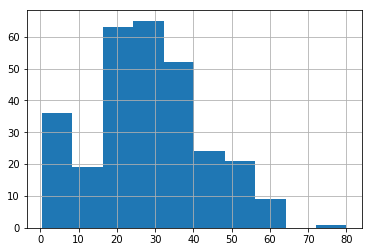

In [157]:
#Comparison of the age distribution
survivors_data['Age'].hist()

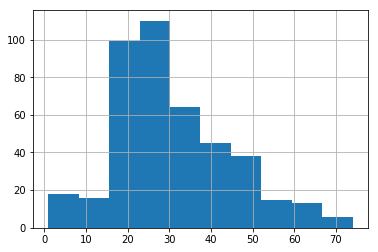

In [158]:
dead_data['Age'].hist()

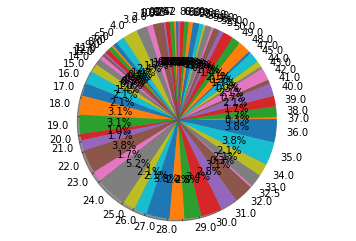

In [159]:
#survivors by age
labels = survivors_data_by_age['Age']
sizes = survivors_data_by_age['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

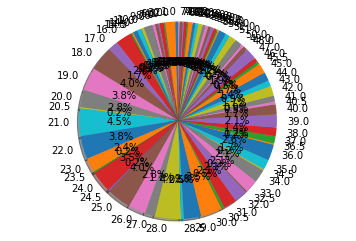

In [160]:
#dead by age
labels = dead_data_by_age['Age']
sizes = dead_data_by_age['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [161]:
#group by Sex
survivors_data_by_sex = survivors_data.groupby('Sex',as_index = False).count()
dead_data_by_sex = dead_data.groupby('Sex',as_index = False).count()

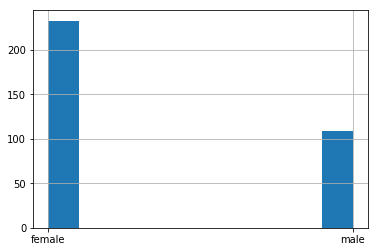

In [162]:
#Comparison of the gender distribution
survivors_data['Sex'].hist()

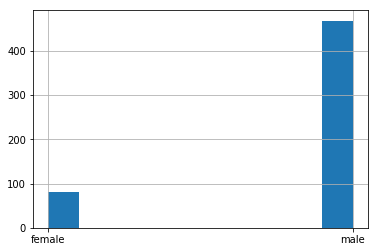

In [163]:
dead_data['Sex'].hist()

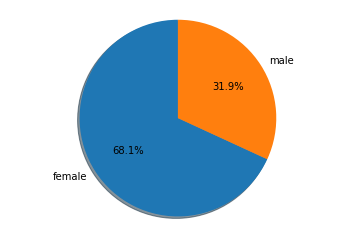

In [164]:
#survivors by gender
labels = survivors_data_by_sex['Sex']
sizes = survivors_data_by_sex['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

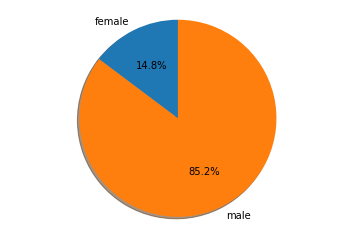

In [165]:
#dead by gender
labels = dead_data_by_sex['Sex']
sizes = dead_data_by_sex['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [166]:
# group by SibSp
survivors_data_by_SibSp = survivors_data.groupby('SibSp',as_index = False).count()
dead_data_by_SibSp = dead_data.groupby('SibSp',as_index = False).count()

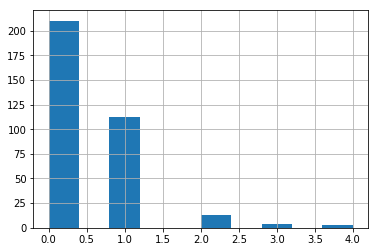

In [167]:
#Comparison of the SibSp distribution
survivors_data['SibSp'].hist()

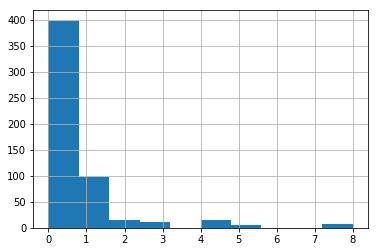

In [168]:
dead_data['SibSp'].hist()

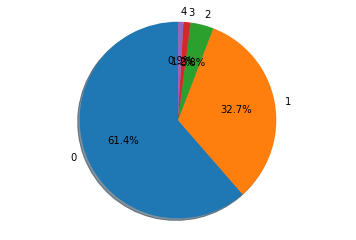

In [169]:
#survivors by sibsp
labels = survivors_data_by_SibSp['SibSp']
sizes = survivors_data_by_SibSp['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

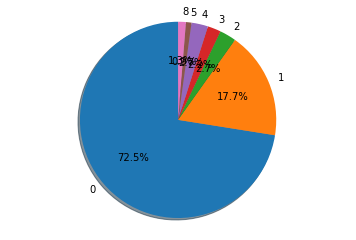

In [170]:
#dead by sibsp
labels = dead_data_by_SibSp['SibSp']
sizes = dead_data_by_SibSp['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [171]:
# group by Parch
survivors_data_by_Parch = survivors_data.groupby('Parch',as_index = False).count()
dead_data_by_Parch = dead_data.groupby('Parch',as_index = False).count()

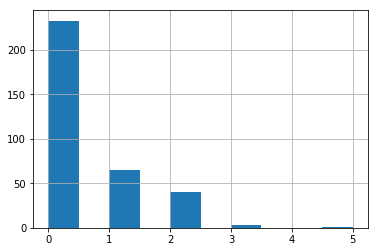

In [172]:
#Comparison of the Parch distribution
survivors_data['Parch'].hist()

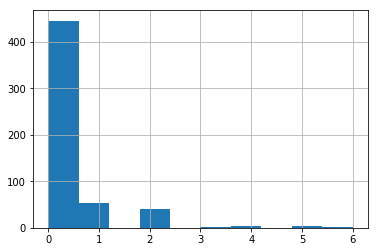

In [173]:
dead_data['Parch'].hist()

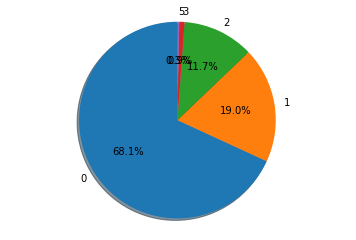

In [174]:
#survivors by Parch
labels = survivors_data_by_Parch['Parch']
sizes = survivors_data_by_Parch['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

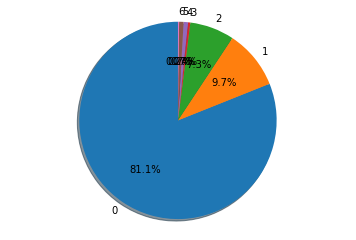

In [175]:
#dead by Parch
labels = dead_data_by_Parch['Parch']
sizes = dead_data_by_Parch['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [176]:
# group by Fare
survivors_data_by_Fare = survivors_data.groupby('Fare',as_index = False).count()
dead_data_by_Fare = dead_data.groupby('Fare',as_index = False).count()

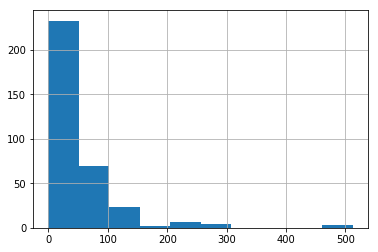

In [177]:
#Comparison of the Fare distribution
survivors_data['Fare'].hist()

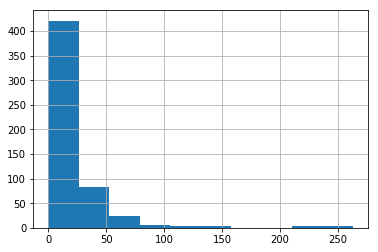

In [178]:
dead_data['Fare'].hist()

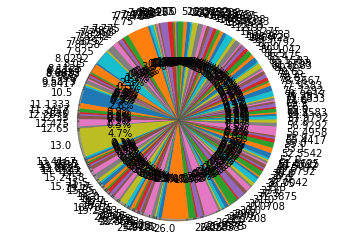

In [179]:
#survivors by Fare
labels = survivors_data_by_Fare['Fare']
sizes = survivors_data_by_Fare['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

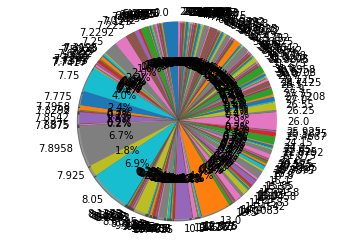

In [180]:
#dead by Fare
labels = dead_data_by_Fare['Fare']
sizes = dead_data_by_Fare['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [181]:
# group by Embarked
survivors_data_by_Embarked = survivors_data.groupby('Embarked',as_index = False).count()
dead_data_by_Embarked = dead_data.groupby('Embarked',as_index = False).count()

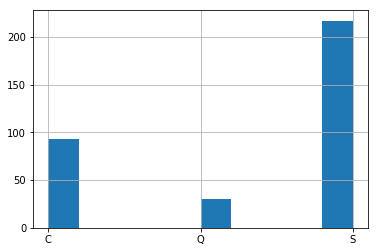

In [182]:
#Comparison of the Embarked distribution
survivors_data['Embarked'].hist()

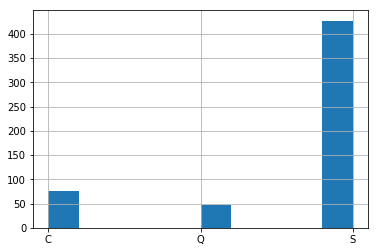

In [183]:
dead_data['Embarked'].hist()

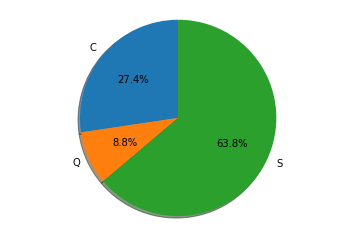

In [184]:
#survivors by Embarked
labels = survivors_data_by_Embarked['Embarked']
sizes = survivors_data_by_Embarked['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

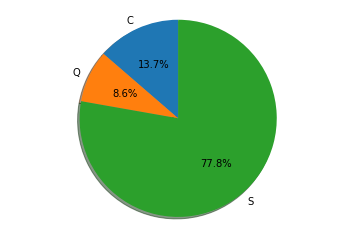

In [185]:
#dead by Embarked
labels = dead_data_by_Embarked['Embarked']
sizes = dead_data_by_Embarked['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [186]:
# group by Pclass
survivors_data_by_Pclass = survivors_data.groupby('Pclass',as_index = False).count()
dead_data_by_Pclass = dead_data.groupby('Pclass',as_index = False).count()

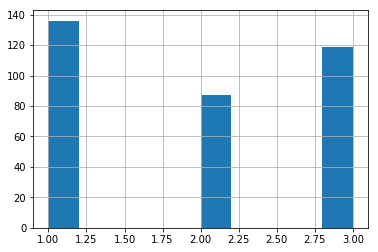

In [187]:
#Comparison of the Embarked distribution
survivors_data['Pclass'].hist()

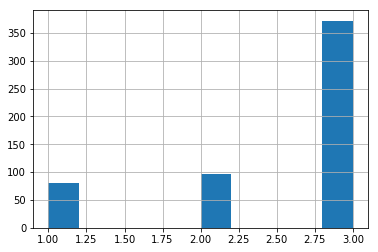

In [188]:
dead_data['Pclass'].hist()

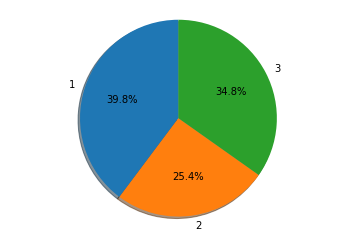

In [193]:
#survivors by Pclass
labels = survivors_data_by_Pclass['Pclass']
sizes = survivors_data_by_Pclass['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

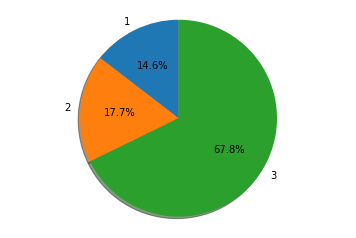

In [194]:
#dead by Pclass
labels = dead_data_by_Pclass['Pclass']
sizes = dead_data_by_Pclass['Survived']
plt.pie(sizes,  labels=labels, \
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

/Users/baraasaid/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/baraasaid/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


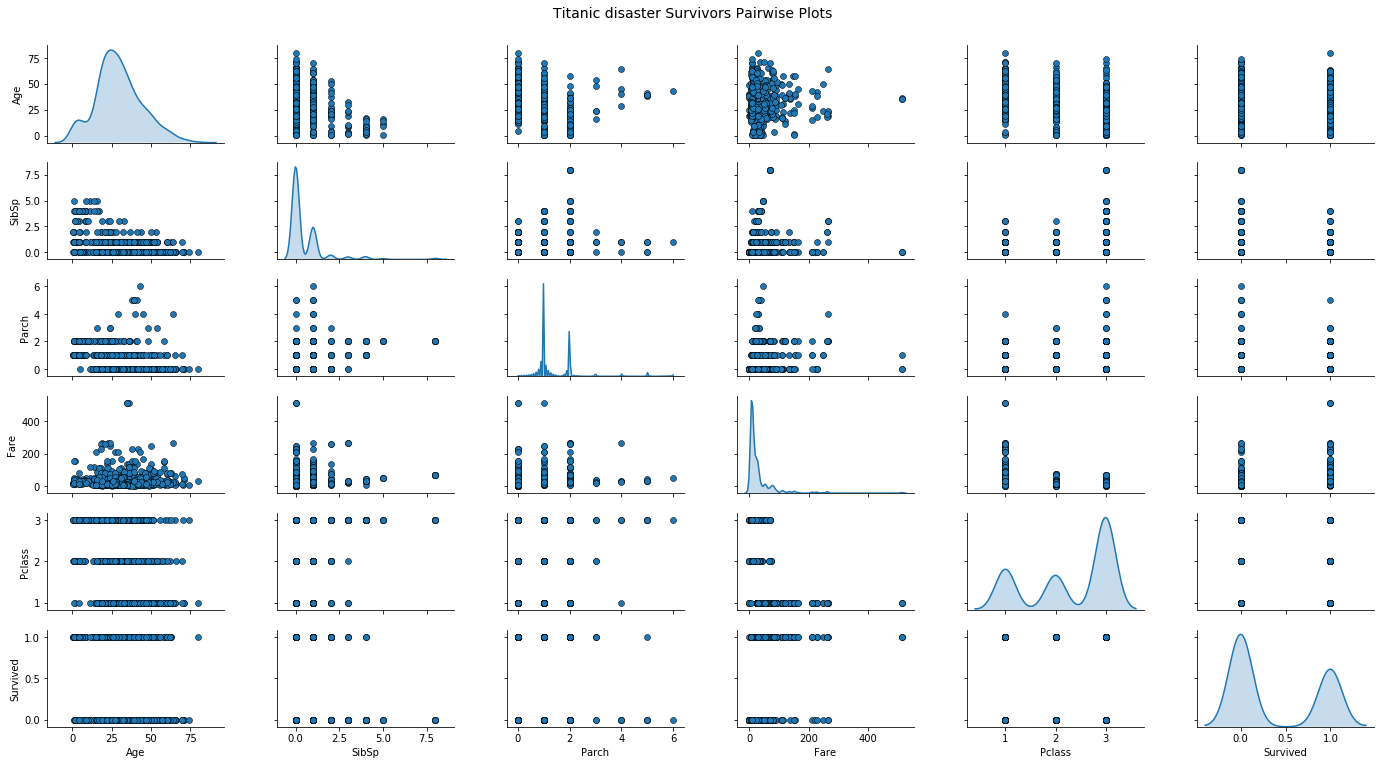

In [195]:
# Pair-wise Scatter Plots
cols = ['Sex','Age','SibSp','Parch','Fare','Pclass','Embarked','Survived']
pp = sns.pairplot(new_data[cols], size=1.8, aspect=1.8,\
                  plot_kws=dict(edgecolor="k", linewidth=0.5),\
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Titanic disaster Survivors Pairwise Plots', fontsize=14)

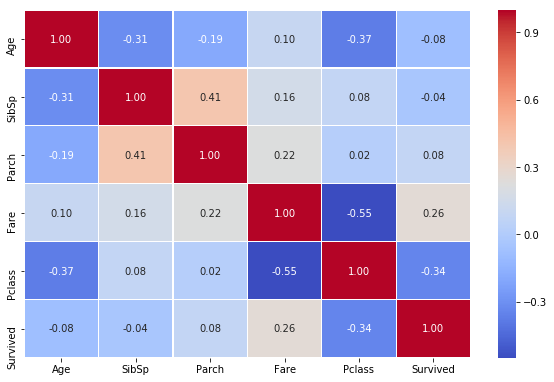

In [197]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = new_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",\
                 fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)


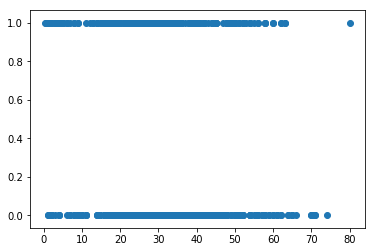

In [198]:
#cols = ['Sex','Age','SibSp','Parch','Fare','Embarked','Survived']
plt.scatter(new_data['Age'], new_data['Survived'])

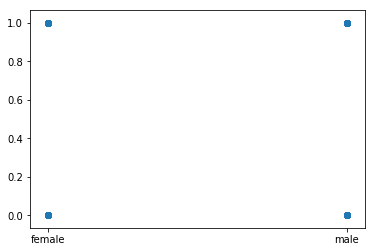

In [199]:
plt.scatter(new_data['Sex'], new_data['Survived'])

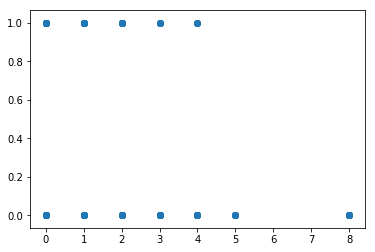

In [200]:
plt.scatter(new_data['SibSp'], new_data['Survived'])

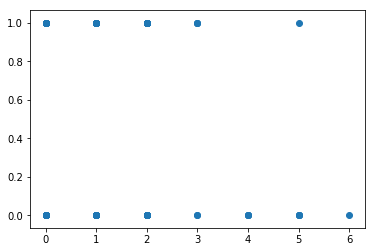

In [201]:
plt.scatter(new_data['Parch'], new_data['Survived'])

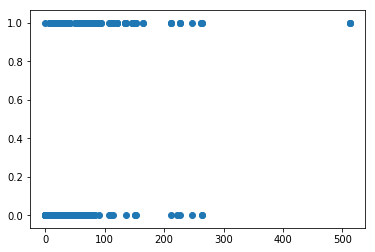

In [202]:
plt.scatter(new_data['Fare'], new_data['Survived'])

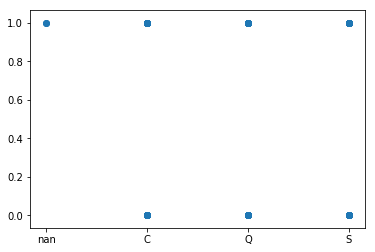

In [203]:
plt.scatter(new_data['Embarked'], new_data['Survived'])

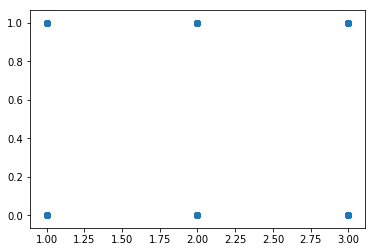

In [204]:
plt.scatter(new_data['Pclass'], new_data['Survived'])

# Running the model

In [205]:
#preparing the data
Sex_Embarked_data = new_data[['Sex','Embarked']]

In [206]:
Sex_Embarked_dummies = pd.get_dummies(Sex_Embarked_data)

In [207]:
#concatenate data
df = pd.concat([Sex_Embarked_dummies, new_data[['Age','Pclass',\
                                                       'SibSp','Parch',\
                                                       'Fare','Survived']]]\
                     , axis = 1)

In [217]:
df = df.fillna(method='ffill').fillna(method='bfill')

In [218]:
#splitting data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [221]:
train_x = train[['Sex_female','Sex_male','Embarked_C','Embarked_Q',\
 'Embarked_S','Age','Pclass','SibSp','Parch','Fare']]
train_y = train['Survived']

In [223]:
#training the model
Log_Reg_model = logisticRegr.fit(train_x, train_y )

In [224]:
x_test = test[['Sex_female','Sex_male','Embarked_C','Embarked_Q',\
 'Embarked_S','Age','Pclass','SibSp','Parch','Fare']]
y_test = test['Survived']

In [225]:
predictions = logisticRegr.predict(x_test)

In [226]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.7653631284916201


In [227]:
#evaluating the model using cross fold 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train_x, train_y, \
                                          cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.799
